In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator
from chinese_calendar import is_workday
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  # 可以替换为其他支持中文的字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号 '-' 显示为方块的问题
import random
import numpy as np

In [2]:
import pandas as pd
pd.set_option('display.max_rows', None)  # 设置为None表示不限制行数
pd.set_option('display.max_columns', None)  # 设置为None表示不限制列数

In [71]:
# df = pd.read_csv("历史dau预测.csv")
df = pd.read_csv("1-07.csv")
df["date_day"] = pd.to_datetime(df["date_day"])
df_pred = pd.read_csv("2025春节情人节预测数据下载.csv")
df_pred.columns = df.columns
df_pred["date_day"] = pd.to_datetime(df_pred["date_day"])

In [72]:
# 判断是否为节假日
def isweekend(x):
    if is_workday(x):
        return False
    else:
        return True

# def isweekend(date_series):
#     # dt.dayofweek返回0-6，其中5和6分别代表周六和周日
#     return (date_series.dayofweek == 5) | (date_series.dayofweek == 6)
df["isweekend"] = df["date_day"].apply(isweekend)
df_pred["isweekend"] = df_pred["date_day"].apply(isweekend)

In [73]:
# 计算环比增长率
df["环比增长率"] = (df["dau"].pct_change()* 100).apply(lambda x: f'{x:.2f}%')
df_pred["环比增长率"] = (df_pred["dau"].pct_change()* 100).apply(lambda x: f'{x:.2f}%')

In [74]:
df.tail()

,date_day,dau,log_dau,isweekend,环比增长率
1828,2025-01-02,27884318,17.143575,False,-11.45%
1829,2025-01-03,28280142,17.157670,False,1.42%
1830,2025-01-04,30645724,17.238004,True,8.36%
1831,2025-01-05,30582068,17.235924,True,-0.21%
1832,2025-01-06,26331023,17.086258,False,-13.90%


In [75]:
df_pred.loc[20:50]

,date_day,dau,log_dau,isweekend,环比增长率
20,2025-01-22,29598623,20250102,False,-2.94%
21,2025-01-23,29402002,20250102,False,-0.66%
22,2025-01-24,31523059,20250102,False,7.21%
23,2025-01-25,33172319,20250102,True,5.23%
24,2025-01-26,29400468,20250102,False,-11.37%
25,2025-01-27,26853019,20250102,False,-8.66%
26,2025-01-28,26280484,20250102,True,-2.13%
27,2025-01-29,29484624,20250102,True,12.19%
28,2025-01-30,30907490,20250102,True,4.83%
29,2025-01-31,33812993,20250102,True,9.40%


In [76]:
import pandas as pd
holiday_time_dict = {
    '年份': [2020, 2021, 2022, 2023, 2024, 2025],
    '春节开始时间': ['2020-01-24', '2021-02-11', '2022-01-31', '2023-01-21', '2024-02-09', '2025-01-28'],
    '春节结束时间': ['2020-01-30', '2021-02-17', '2022-02-06', '2023-01-27', '2024-02-17', '2025-02-04']
}


holi_time = pd.DataFrame(holiday_time_dict)
holi_time.index = holi_time["年份"].tolist()
holi_time

,年份,春节开始时间,春节结束时间
2020,2020,2020-01-24,2020-01-30
2021,2021,2021-02-11,2021-02-17
2022,2022,2022-01-31,2022-02-06
2023,2023,2023-01-21,2023-01-27
2024,2024,2024-02-09,2024-02-17
2025,2025,2025-01-28,2025-02-04


In [9]:
## 2025年的预测部分  截止情人节2-14号

KeyError: 'yhat'

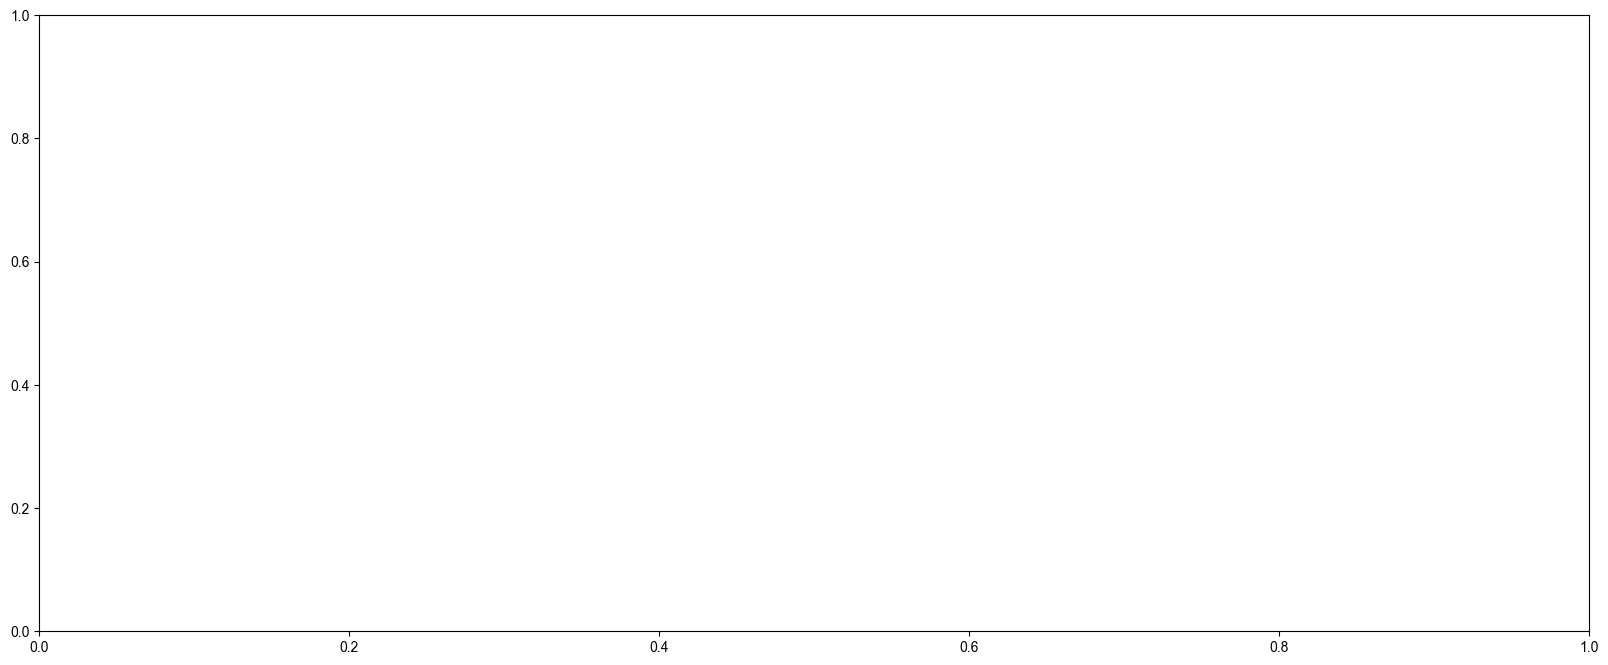

In [10]:
def plot_dau_pred(df,year, label):
    df["date_day"] = pd.to_datetime(df["date_day"])
    year_filter = (df["date_day"].dt.year == year)
    year_df = df[year_filter]
    fig, ax = plt.subplots(figsize=(20, 8))
    year_df.plot(x="date_day",y=label, ax=ax)
    # 设置 x 轴和 y 轴的标签
    ax.set_xlabel("Day")
    ax.set_ylabel(label)
    # 设置 x 轴的主要定位器为日期定位器
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
    # 设置 x 轴的主要格式化器为日期格式化器
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    # 自动调整 x 轴标签的角度以避免重叠
    plt.xticks(rotation=90)
    # 显示图形
    plt.show()
year = 2025
label = "yhat"
plot_dau_pred(df_pred,year,label)

# 一、各年份-除夕前后dau走势对比

-8 -0.250919762305275
-7 0.9014286128198323
-6 3.46398788362281
-5 3.197316968394073
-4 2.312037280884873
-3 2.3119890406724055
-2 2.116167224336399
-1 3.73235229154987
dau    3.491992e+07
Name: 4, dtype: float64
dau    3.470194e+07
Name: 5, dtype: float64
dau    3.520104e+07
Name: 6, dtype: float64
dau    3.470480e+07
Name: 7, dtype: float64
dau    3.435868e+07
Name: 8, dtype: float64
dau    3.465519e+07
Name: 9, dtype: float64
dau    3.498599e+07
Name: 10, dtype: float64
dau    3.531828e+07
Name: 11, dtype: float64


/var/folders/10/3q3hmvzd0717slbr1jm_l_280000gn/T/ipykernel_3831/3928588482.py:68: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '32407938.880278904' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  return_df.loc[i] = return_df.loc[i-1] + return_df.loc[i-1] * np.random.uniform(1,4)*b


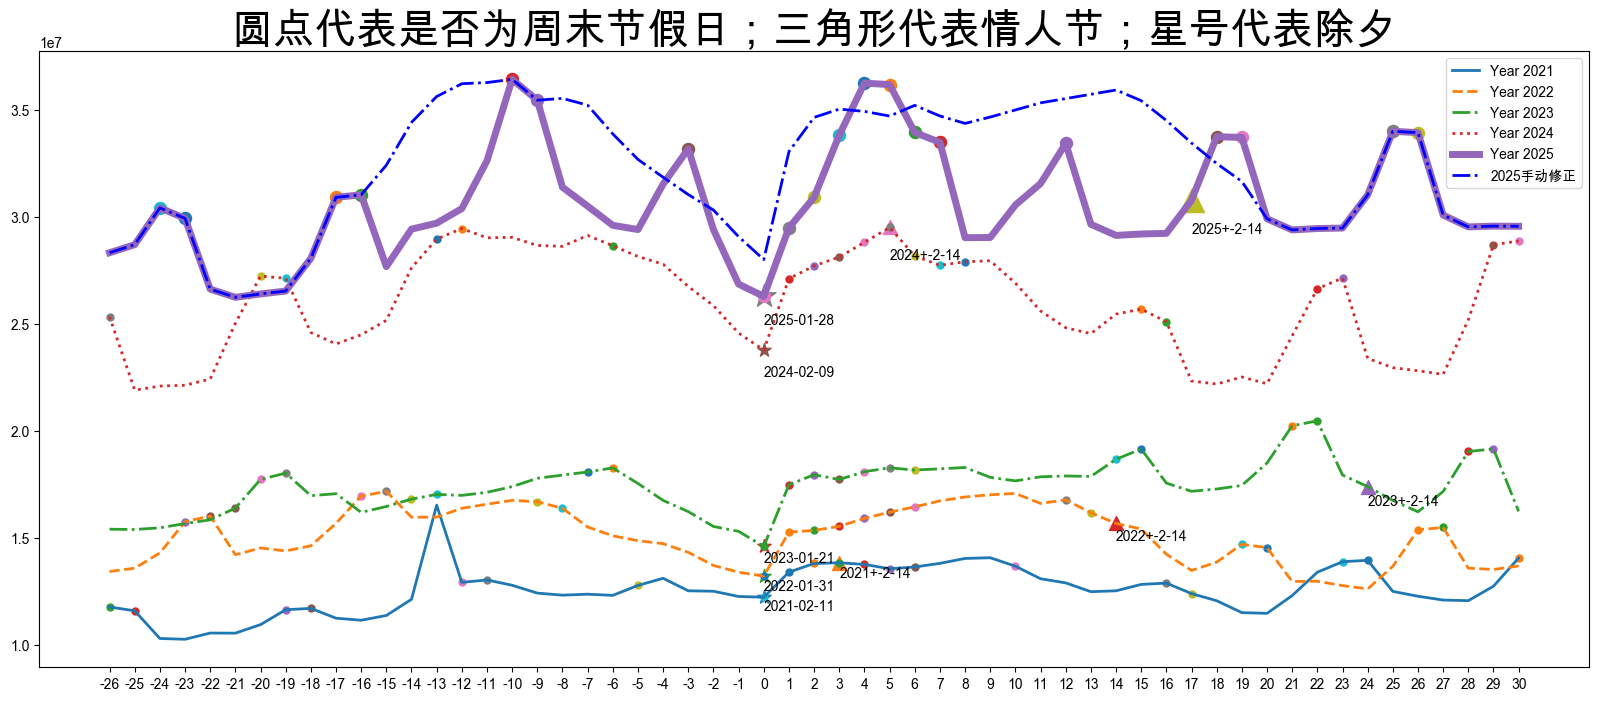

In [77]:
# 把除夕前后5天、15天的数据的每年数据画出来
def plot_each_year_together(df,df_pred,his_years,holi_time,pre_days=26,suf_days=30):
    """
    """
    x_days = list(range(-pre_days,0)) +[0] + list(range(1,suf_days+1))
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
    line_styles = ['-', '--', '-.', ':', 'solid', 'dashed']
    year_len = len(his_years)+1
    colors = colors[:year_len]
    line_styles = line_styles[:year_len]
    # 创建一个画布
    fig, ax = plt.subplots(figsize=(20, 8))
    df_li = [] 
    columns = ["离除夕的天数","环比增长率","是否为周末节假日"]
    for i,year in enumerate(his_years+[2025]):
        chuxi_time = pd.to_datetime(holi_time.loc[year,"春节开始时间"])
        start = chuxi_time - pd.to_timedelta(f"{pre_days}Days")
        end = chuxi_time + pd.to_timedelta(f"{suf_days}Days")
        if year==2025:
            plot_df = df_pred
            label = "dau"
            linewidth=5
            s=300
        else:
            plot_df = df
            label = "dau"
            linewidth=2
            s=100
        y_dau_filter = (plot_df["date_day"]>=start) & (plot_df["date_day"]<=end)
        y_dau = plot_df[y_dau_filter][label].tolist()
        if year==2025:
            return_df = plot_df[y_dau_filter][[label]]
            return_df.index = x_days
        is_weekend = plot_df[y_dau_filter]["isweekend"].tolist()
        pct_change = plot_df[y_dau_filter]["环比增长率"].tolist()
        # 文本：除夕时间
        ax.text(0,y_dau[pre_days]*0.95,pd.to_datetime(chuxi_time, format="%Y%m%d").strftime('%Y-%m-%d'))
        ax.plot(x_days, y_dau, label=f'Year {year}', linestyle=line_styles[i], color=colors[i],linewidth=linewidth)
        # 标记除夕时间
        ax.scatter(0,y_dau[pre_days],marker = "*",s=s)
        valentine_index = (pd.to_datetime(str(year)+"-02-14") - chuxi_time).days
        y = y_dau[pre_days+valentine_index]
        ax.text(valentine_index,y*0.95,f"{str(year)}+-2-14")
        ax.scatter(valentine_index,y,marker = "^",s=s)
        for i,(a,b) in enumerate(zip(x_days,is_weekend)):
            if b:
                ax.scatter(a,y_dau[i],marker = ".",s=s)
        # 画出除夕后5的环比增长率
        pct_change_li = []
        index_range = range(-10,10)
        for k in index_range:
            # ax.text(0+k,y_dau[pre_days+k]*1.03,pct_change[pre_days+k])
            pct_change_li.append(pct_change[pre_days+k])
        df_li.append(pct_change_li)
    # 生成除夕前后增长率的df
    df = pd.DataFrame(df_li,columns=index_range,index=his_years+[2025])
    ax.set_xticks(x_days)
    plt.title("圆点代表是否为周末节假日；三角形代表情人节；星号代表除夕",fontsize=30)
    return df,return_df,ax
his_years = [2021,2022,2023,2024]
  # 四种不同的线型
pct_df,return_df,ax = plot_each_year_together(df,df_pred,his_years,holi_time)
# 从index -15开始，没啥周期性，逐渐开始高位了
np.random.seed(42)
b=0.026
for i in range(-15,-10):
    b-=0.005
    return_df.loc[i] = return_df.loc[i-1] + return_df.loc[i-1] * np.random.uniform(1,4)*b


# 除夕前的dau往年变化比较平稳，周末的周期性在这体现不会很强
return_df.loc[-4] = return_df.loc[-5]-100000
return_df.loc[-3] = (return_df.loc[-3]-return_df.loc[-4])//4 + return_df.loc[-4]
## 除夕前的一个星期一般下降趋势也非常平稳
np.random.seed(42)
for i in range(-8,-6):
    a = np.random.uniform(-1,1)
    return_df.loc[i] = return_df.loc[i-1] - return_df.loc[i-1] * a*0.01
    print(f"{i}",a)
for i in range(-6,0):
    a = np.random.uniform(2,4)
    return_df.loc[i] = return_df.loc[i-1] - return_df.loc[i-1] * a*0.011
    print(f"{i}",a)
# 感觉低位太低了，得提高一点
return_df.loc[0] = 28000000
# 除夕后，按往年应该迅速升高，然后平稳增长或者不变
return_df.loc[1] = return_df.loc[0] + return_df.loc[0]*0.18
return_df.loc[2] = (return_df.loc[1]+return_df.loc[4])/2
return_df.loc[3] = (return_df.loc[3] + return_df.loc[4])/2

# 从峰值（36239348）index为4开始，后面认为应该缓慢下降，且应该往年后的周末峰值下降，年后的峰值应为3370w,index8下降的有点快,觉得后续的变动在5w内比较合理
return_df.loc[6] = (return_df.loc[5] + return_df.loc[6])/2
for index in range(4,12):
    return_df.loc[index] = return_df.loc[index-1] - return_df.loc[index-1]* np.random.uniform(-1,1)*0.015
    print(return_df.loc[index])

return_df.loc[12] = return_df.loc[11] + 200000
return_df.loc[13] = return_df.loc[12] + 200000
return_df.loc[14] = return_df.loc[13] + 200000
# index13 为情人节前两天，观察历史年份可能维持在春节的水平左右，
return_df.loc[15] = 35419367

for i in range(16,20):
    return_df.loc[i] = return_df.loc[i-1]- return_df.loc[i-1]* np.random.uniform(2,4)*0.01
ax.plot(return_df.index.tolist(),return_df["dau"],linestyle="-.",color="b",linewidth=2,label=f'2025手动修正')

ax.legend()
# 这种调整方式仍存在一些值得怀疑的地方

# 凹版

return_df.loc[-10] dau    34045795
Name: -10, dtype: int64
return_df.loc[-9] dau    27671929
Name: -15, dtype: int64
return_df.loc[15] dau    34184886
Name: 15, dtype: int64
return_df.loc[4] dau    34036265
Name: 4, dtype: int64
-8 -0.250919762305275
-7 0.9014286128198323
-6 3.46398788362281
-5 3.197316968394073
-4 2.312037280884873
-3 2.3119890406724055
-2 2.116167224336399
-1 3.73235229154987
dau    3.354826e+07
Name: 3, dtype: float64
dau    3.309464e+07
Name: 4, dtype: float64
dau    3.286430e+07
Name: 5, dtype: float64
dau    3.276703e+07
Name: 6, dtype: float64
dau    3.310517e+07
Name: 7, dtype: float64
dau    3.344682e+07
Name: 8, dtype: float64
dau    3.389024e+07
Name: 9, dtype: float64
dau    3.351795e+07
Name: 10, dtype: float64
dau    3.341627e+07
Name: 11, dtype: float64


/var/folders/10/3q3hmvzd0717slbr1jm_l_280000gn/T/ipykernel_3831/461659363.py:83: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '31880866.92588694' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  return_df.loc[i] = return_df.loc[i-1] + return_df.loc[i-1] * np.random.uniform(1,4)*b


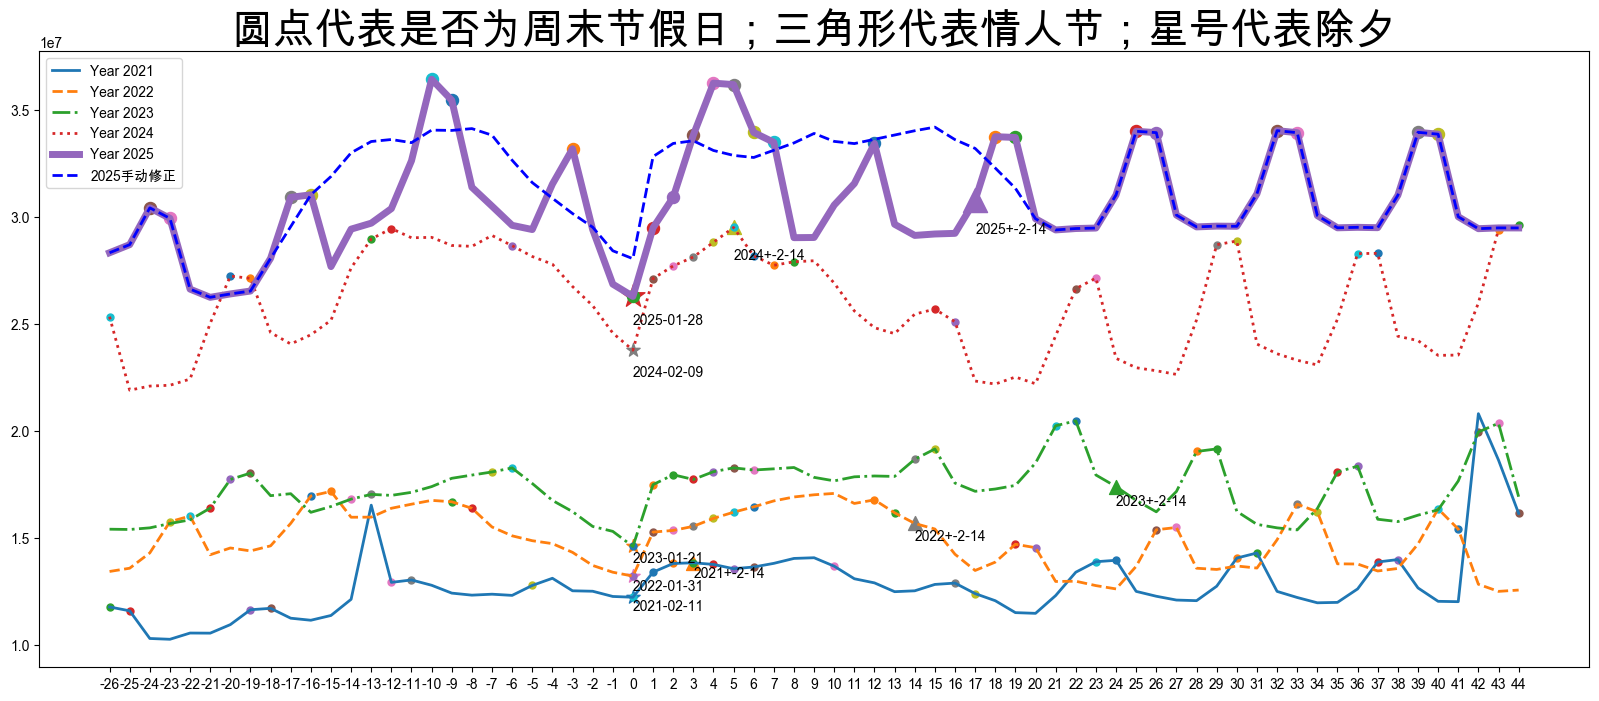

In [78]:
# 把除夕前后5天、15天的数据的每年数据画出来
def top_num():
    top = 34000000 + np.random.randint(30000,100000)
    return top
def plot_each_year_together(df,df_pred,his_years,holi_time,pre_days=26,suf_days=44):
    x_days = list(range(-pre_days,0)) +[0] + list(range(1,suf_days+1))
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
    line_styles = ['-', '--', '-.', ':', 'solid', 'dashed']
    year_len = len(his_years)+1
    colors = colors[:year_len]
    line_styles = line_styles[:year_len]
    # 创建一个画布
    fig, ax = plt.subplots(figsize=(20, 8))
    df_li = [] 
    columns = ["离除夕的天数","环比增长率","是否为周末节假日"]
    for i,year in enumerate(his_years+[2025]):
        chuxi_time = pd.to_datetime(holi_time.loc[year,"春节开始时间"])
        start = chuxi_time - pd.to_timedelta(f"{pre_days}Days")
        end = chuxi_time + pd.to_timedelta(f"{suf_days}Days")
        if year==2025:
            plot_df = df_pred
            label = "dau"
            linewidth=5
            s=300
        else:
            plot_df = df
            label = "dau"
            linewidth=2
            s=100
        y_dau_filter = (plot_df["date_day"]>=start) & (plot_df["date_day"]<=end)
        y_dau = plot_df[y_dau_filter][label].tolist()
        if year==2025:
            return_df = plot_df[y_dau_filter][[label]]
            return_df.index = x_days
        is_weekend = plot_df[y_dau_filter]["isweekend"].tolist()
        pct_change = plot_df[y_dau_filter]["环比增长率"].tolist()
        # 文本：除夕时间
        ax.text(0,y_dau[pre_days]*0.95,pd.to_datetime(chuxi_time, format="%Y%m%d").strftime('%Y-%m-%d'))
        ax.plot(x_days, y_dau, label=f'Year {year}', linestyle=line_styles[i], color=colors[i],linewidth=linewidth)
        # 标记除夕时间
        ax.scatter(0,y_dau[pre_days],marker = "*",s=s)
        valentine_index = (pd.to_datetime(str(year)+"-02-14") - chuxi_time).days
        y = y_dau[pre_days+valentine_index]
        ax.text(valentine_index,y*0.95,f"{str(year)}+-2-14")
        ax.scatter(valentine_index,y,marker = "^",s=s)
        for i,(a,b) in enumerate(zip(x_days,is_weekend)):
            if b:
                ax.scatter(a,y_dau[i],marker = ".",s=s)
        # 画出除夕后5的环比增长率
        pct_change_li = []
        index_range = range(-10,10)
        for k in index_range:
            # ax.text(0+k,y_dau[pre_days+k]*1.03,pct_change[pre_days+k])
            pct_change_li.append(pct_change[pre_days+k])
        df_li.append(pct_change_li)
    # 生成除夕前后增长率的df
    df = pd.DataFrame(df_li,columns=index_range,index=his_years+[2025])
    ax.set_xticks(x_days)
    plt.title("圆点代表是否为周末节假日；三角形代表情人节；星号代表除夕",fontsize=30)
    return df,return_df,ax
his_years = [2021,2022,2023,2024]
  # 四种不同的线型
pct_df,return_df,ax = plot_each_year_together(df,df_pred,his_years,holi_time)

# 年前的峰值和年后的峰值不超过3400w
np.random.seed(42)
return_df.loc[-10] = top_num()
print("return_df.loc[-10]",return_df.loc[-10])
return_df.loc[-9] = top_num()
print("return_df.loc[-9]",return_df.loc[-15])
return_df.loc[15] = top_num()+ 100000
print("return_df.loc[15]",return_df.loc[15]) 
return_df.loc[4] = top_num()
print("return_df.loc[4]",return_df.loc[4])


#从index -15开始，没啥周期性，逐渐开始高位了
np.random.seed(42)
b=0.017
return_df.loc[-17] =  (return_df.loc[-18]+return_df.loc[-16])/2
for i in range(-15,-10):
    b-=0.004
    return_df.loc[i] = return_df.loc[i-1] + return_df.loc[i-1] * np.random.uniform(1,4)*b


# 除夕前的dau往年变化比较平稳，周末的周期性在这体现不会很强
return_df.loc[-4] = return_df.loc[-5]-100000
return_df.loc[-3] = (return_df.loc[-3]-return_df.loc[-4])//4 + return_df.loc[-4]
## 除夕前的一个星期一般下降趋势也非常平稳
np.random.seed(42)
for i in range(-8,-6):
    a = np.random.uniform(-1,1)
    return_df.loc[i] = return_df.loc[i-1] - return_df.loc[i-1] * a*0.01
    print(f"{i}",a)
for i in range(-6,0):
    a = np.random.uniform(2,4)
    return_df.loc[i] = return_df.loc[i-1] - return_df.loc[i-1] * a*0.01
    print(f"{i}",a)
# 感觉低位太低了，得提高一点
np.random.seed(40)
return_df.loc[0] = 28000000 + np.random.randint(30000,100000)
# 除夕后，按往年应该迅速升高，然后平稳增长或者不变
return_df.loc[1] = return_df.loc[0] + return_df.loc[0]*0.17
return_df.loc[2] = (return_df.loc[1]+return_df.loc[4])/2


# 从峰值（36239348）index为4开始，后面认为应该缓慢下降，且应该往年后的周末峰值下降，年后的峰值应为3370w,index8下降的有点快,觉得后续的变动在5w内比较合理
# return_df.loc[6] = (return_df.loc[5] + return_df.loc[6])/2
np.random.seed(42)
for index in range(3,12):
    return_df.loc[index] = return_df.loc[index-1] - return_df.loc[index-1]* np.random.uniform(-1,1)*0.015
    print(return_df.loc[index])

return_df.loc[12] = return_df.loc[11] + 200000
return_df.loc[13] = return_df.loc[12] + 200000
return_df.loc[14] = return_df.loc[13] + 200000
# index13 为情人节前两天，观察历史年份可能维持在春节的水平左右，

c=0.004
for i in range(16,20):
    c+=0.001
    return_df.loc[i] = return_df.loc[i-1]- return_df.loc[i-1]* np.random.uniform(2,4)*c
return_df = return_df.astype(int)
ax.plot(return_df.index.tolist(),return_df["dau"],linestyle="--",color="b",linewidth=2,label=f'2025手动修正')



ax.legend()
# # 这种调整方式仍存在一些值得怀疑的地方

In [79]:
return_df

,dau
-26,28318377
-25,28696490
-24,30415899
-23,29923580
-22,26619536
-21,26237633
-20,26394944
-19,26530258
-18,28057617
-17,29540996


In [63]:
return_df.to_csv("调整.csv")

### 调整
#### 1.历史年份除夕后第一天增长率很高（24年为14.07%，23年为19.76%，22年为15.56%,21年为9.58%），之后变化较为平缓。预测dau除夕低位约2600w，年后峰值3600w，调整低位为2800w（原低位可能偏低，调整后使得除夕T-7下降幅度类似于往年，除夕后第一天的增长幅度类似于往年），年后峰值为3500w（观察图，模型在春节期间可能也拟合了周末的周期趋势，实际峰值可能偏低）
#### 2.往年在除夕T-14后周期性消失（21年的尖尖可能是异常点），T-14到T-7内保持着平稳（水平接近春节期间），大概在除夕T-7左右开始缓慢下降（22年T-8，23年T—6，24年T-7）。本次调整从T-16后增长到峰值，至T-7前较为平稳，T——7开始逐渐下降至除夕低位。
#### 3.25年春节与情人节的间隔与22年较为类似，22年在情人节前两天后逐渐从下降，后面回归正常的周期性，（情人节的后两天恰好是周末，模型把周末趋势也拟合了，但个人认为情人节的节假日效应会影响周末效应，所以这里的调整也不把周末效应考虑进去，直接从情人节前两天开始下降到正常时段的低位）

In [156]:
## 环比增长率，列0代表除夕的增长率（第0天-第-1天）/第-1天

,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9
2021,-1.90%,-2.87%,-0.77%,0.36%,-0.45%,3.77%,2.61%,-4.46%,-0.17%,-1.95%,-0.30%,9.58%,3.02%,0.24%,-0.56%,-1.46%,0.59%,1.25%,1.66%,0.23%
2022,1.08%,-0.39%,-1.83%,-5.32%,-2.66%,-1.51%,-0.91%,-2.77%,-4.27%,-2.31%,-1.35%,15.56%,0.50%,1.25%,2.39%,1.80%,1.55%,1.68%,1.10%,0.60%
2023,1.56%,2.23%,0.84%,0.81%,1.04%,-3.98%,-4.50%,-3.13%,-4.26%,-1.48%,-4.60%,19.76%,2.64%,-1.23%,2.05%,0.99%,-0.56%,0.31%,0.34%,-2.52%
2024,0.07%,-1.31%,-0.14%,1.77%,-1.64%,-1.76%,-1.28%,-3.75%,-3.33%,-4.95%,-3.25%,14.07%,2.18%,1.50%,2.44%,2.41%,-4.51%,-1.55%,0.59%,0.17%
2025,11.66%,-2.69%,-11.46%,-2.81%,-2.94%,-0.66%,7.21%,5.23%,-11.37%,-8.66%,-2.13%,12.19%,4.83%,9.40%,7.18%,-0.19%,-6.18%,-1.36%,-13.30%,0.03%


In [133]:
years = [2021,2022,2023,2024]
suf = "-2-14"
v_years = [pd.to_datetime(str(year)+suf) for year in years]
start = 2
end = 10
for v_year in v_years:
    filter1 = df["date_day"]>=v_year-pd.to_timedelta(f"{start}Days")
    filter2 = df["date_day"]<=v_year+pd.to_timedelta(f"{end}Days")
    print(v_year)
    print(df[filter1 & filter2])

2021-02-14 00:00:00
      date_day       dau    log_dau  isweekend   环比增长率
408 2021-02-12  13402891  16.410981       True   9.58%
409 2021-02-13  13807887  16.440751       True   3.02%
410 2021-02-14  13840893  16.443138       True   0.24%
411 2021-02-15  13764063  16.437572       True  -0.56%
412 2021-02-16  13563282  16.422877       True  -1.46%
413 2021-02-17  13643107  16.428745       True   0.59%
414 2021-02-18  13813927  16.441188      False   1.25%
415 2021-02-19  14043671  16.457682      False   1.66%
416 2021-02-20  14075943  16.459978      False   0.23%
417 2021-02-21  13680523  16.431484       True  -2.81%
418 2021-02-22  13094463  16.387700      False  -4.28%
419 2021-02-23  12901783  16.372876      False  -1.47%
420 2021-02-24  12490856  16.340507      False  -3.19%
2022-02-14 00:00:00
      date_day       dau    log_dau  isweekend    环比增长率
773 2022-02-12  16778680  16.635620       True    1.01%
774 2022-02-13  16175140  16.598986       True   -3.60%
775 2022-02-14  156777

In [17]:
df_pred

,date_day,dau,log_dau,isweekend,环比增长率
0,2025-01-02,28318377,20250102,False,nan%
1,2025-01-03,28696490,20250102,False,1.34%
2,2025-01-04,30415899,20250102,True,5.99%
3,2025-01-05,29923580,20250102,True,-1.62%
4,2025-01-06,26619536,20250102,False,-11.04%
5,2025-01-07,26237633,20250102,False,-1.43%
6,2025-01-08,26394944,20250102,False,0.60%
7,2025-01-09,26530258,20250102,False,0.51%
8,2025-01-10,28057617,20250102,False,5.76%
9,2025-01-11,30906333,20250102,True,10.15%


In [50]:
df["dau"].pct_change().loc[1117]

np.float64(0.19763534936108407)

In [49]:
df.head()

,date_day,dau,log_dau,isweekend,环比增长率
0,2020-01-01,6928991,15.751225,True,nan%
1,2020-01-02,5603664,15.538931,False,-19.13%
2,2020-01-03,5520818,15.524037,False,-1.48%
3,2020-01-04,5972555,15.602685,True,8.18%
4,2020-01-05,5925898,15.594843,True,-0.78%


## 分析
#### 1.情人节（2-14 图中三角形标记点）,历史年份在2-14号的前两三天dau会升高（2024可能是春节和情人节靠的比较近）,2025预测的dau的没有这种现象,与现实背离的可能性较大
#### 2.按2021-2024来看，除夕第二天后持续12天，dau的变化会比较平缓，都保持一个较高的水平；而2025的预测dau在这段时间的后半段下降幅度比较大；年前的dau峰值维持在3200w左右（因为总体具有增长趋势，年后的峰值维持在3300w左右也比较正常），个人认为这部分的下降幅度会比较缓慢，向3300往上附近靠近
#### 3.2025年 1-25号周六（图种x为-3时），1-26周天但调休，这里模型拟合周末的周期性，但怀疑这块的涨幅有点过高了，除夕的前两周左右周期性没有那么强，一般是倒数第二周比较平缓，倒数第一周平缓下降到除夕最低点

## 改动理由
#### 1 改动部分1：除夕后至情人节
#### 1.1 根据分析1，情人节前两天dau会升高，且前二天会比前一天高，峰值水平一般≥春节峰值
#### 1.2 根据分析2，春节的dau变化一般平缓，且一般在年前的周末峰值（这里为3200w）或年后的周末峰值（这里预测为3370w左右），春节的峰值在3600w，如果持续保持在峰值水平会觉得有点不合理，所以认为会缓慢朝3370w下降，直至情人节重新升高
#### 2 改动部分2：除夕前的一段时间
#### 2.1 根据分析3，较大程度的削弱了除夕前一周的涨幅

(array([20011., 20018., 20028., 20035., 20042., 20049., 20058.]),
 [Text(20011.0, 0, '2024-10-15'),
  Text(20018.0, 0, '2024-10-22'),
  Text(20028.0, 0, '2024-11-01'),
  Text(20035.0, 0, '2024-11-08'),
  Text(20042.0, 0, '2024-11-15'),
  Text(20049.0, 0, '2024-11-22'),
  Text(20058.0, 0, '2024-12-01')])

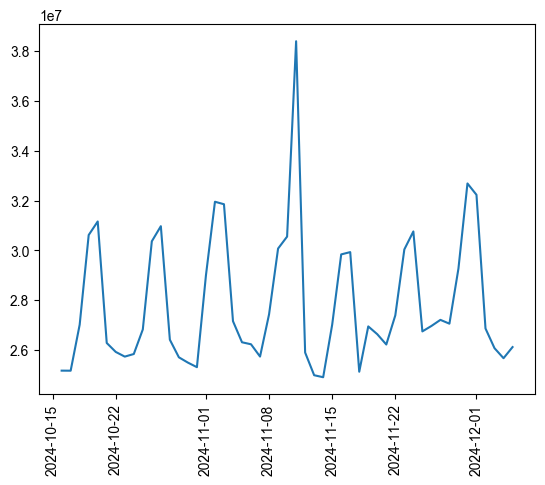

In [414]:
# 24年双十一峰值
temp = df.loc[1750:1800]
plt.plot(temp["date_day"],temp["dau"])
plt.xticks(rotation=90)

(array([19905., 19936., 19967., 19997., 20028., 20058., 20089.]),
 [Text(19905.0, 0, '2024-07'),
  Text(19936.0, 0, '2024-08'),
  Text(19967.0, 0, '2024-09'),
  Text(19997.0, 0, '2024-10'),
  Text(20028.0, 0, '2024-11'),
  Text(20058.0, 0, '2024-12'),
  Text(20089.0, 0, '2025-01')])

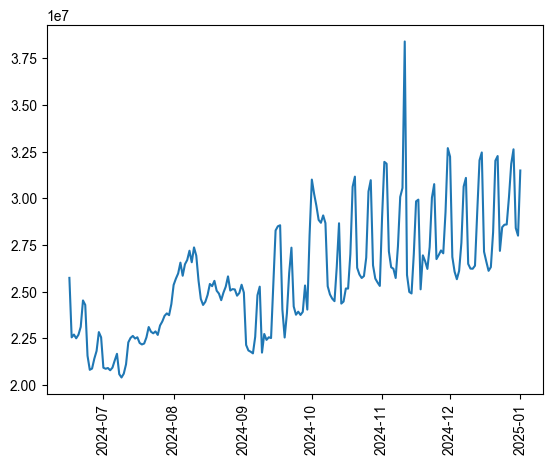

In [411]:
plt.plot(df.iloc[-200:]["date_day"],df.iloc[-200:]["dau"])
plt.xticks(rotation=90)

2021双11距离除夕的index: 92 days 00:00:00
2022双11距离除夕的index: 81 days 00:00:00
2023双11距离除夕的index: 71 days 00:00:00
2024双11距离除夕的index: 90 days 00:00:00


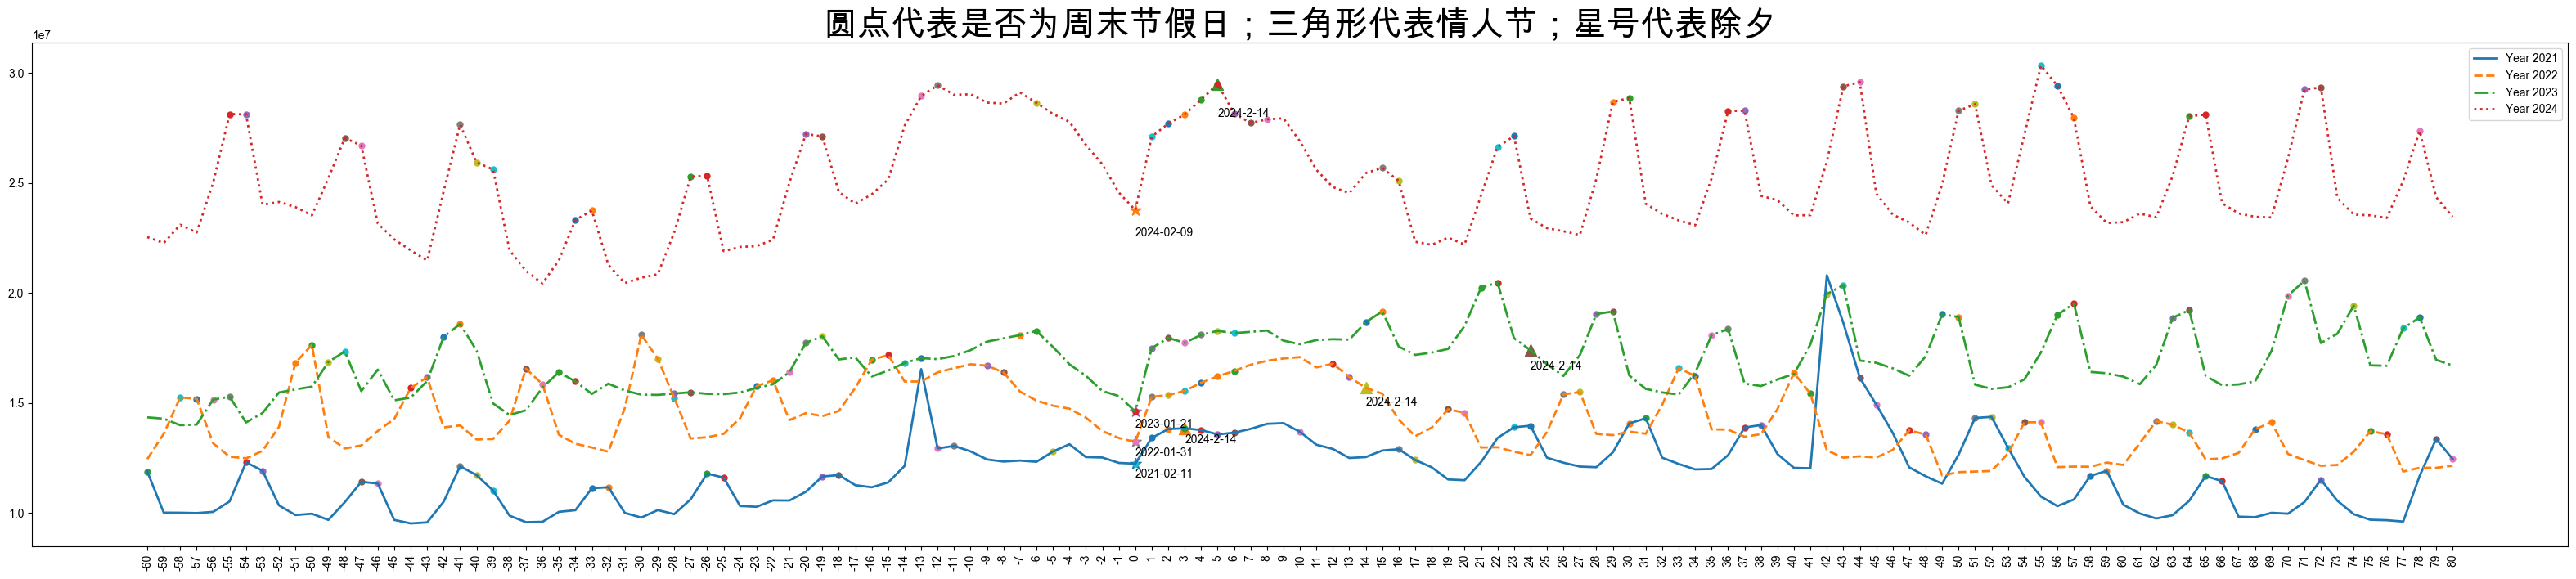

In [107]:
# 把除夕前后5天、15天的数据的每年数据画出来
def plot_each_year_together(df,df_pred,his_years,holi_time,pre_days=60,suf_days=80):
    """
    """
    x_days = list(range(-pre_days,0)) +[0] + list(range(1,suf_days+1))
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
    line_styles = ['-', '--', '-.', ':', 'solid', 'dashed']
    year_len = len(his_years)+1
    colors = colors[:year_len]
    line_styles = line_styles[:year_len]
    # 创建一个画布
    fig, ax = plt.subplots(figsize=(40, 8))
    # for i,year in enumerate(his_years+[2025]):
    for i,year in enumerate(his_years): # 看看历史元旦前的dau 与 春节后平稳下来的dau的对比
        chuxi_time = pd.to_datetime(holi_time.loc[year,"春节开始时间"])
        start = chuxi_time - pd.to_timedelta(f"{pre_days}Days")
        end = chuxi_time + pd.to_timedelta(f"{suf_days}Days")
        if year==2025:
            plot_df = df_pred
            label = "dau"
            linewidth=5
            s=300
        else:
            plot_df = df
            label = "dau"
            linewidth=2
            s=100
        y_dau_filter = (plot_df["date_day"]>=start) & (plot_df["date_day"]<=end)
        y_dau = plot_df[y_dau_filter][label].tolist()
        is_weekend = plot_df[y_dau_filter]["isweekend"].tolist()
        pct_change = plot_df[y_dau_filter]["环比增长率"].tolist()
        # 文本：除夕时间
        ax.text(0,y_dau[pre_days]*0.95,pd.to_datetime(chuxi_time, format="%Y%m%d").strftime('%Y-%m-%d'))
        ax.plot(x_days, y_dau, label=f'Year {year}', linestyle=line_styles[i], color=colors[i],linewidth=linewidth)
        # 标记除夕时间
        ax.scatter(0,y_dau[pre_days],marker = "*",s=s)
        valentine_index = (pd.to_datetime(str(year)+"-02-14") - chuxi_time).days
        y = y_dau[pre_days+valentine_index]
        ax.text(valentine_index,y*0.95,f"2024-2-14")
        ax.scatter(valentine_index,y,marker = "^",s=s)
        for i,(a,b) in enumerate(zip(x_days,is_weekend)):
            if b:
                ax.scatter(a,y_dau[i],marker = ".",s=s)
        # 画出除夕后5的环比增长率
        print(f"{year}双11距离除夕的index:",chuxi_time-pd.to_datetime(str(year-1)+"-11-11"))
        pct_change_li = []
        index_range = range(-10,10)
        for k in index_range:
            # ax.text(0+k,y_dau[pre_days+k]*1.03,pct_change[pre_days+k])
            pct_change_li.append(str((pct_change[pre_days+k],is_weekend[pre_days+k])))
    ax.set_xticks(x_days)
    ax.legend()
    plt.title("圆点代表是否为周末节假日；三角形代表情人节；星号代表除夕",fontsize=30)
    plt.xticks(rotation=90)
    return df
his_years = [2021,2022,2023,2024]
  # 四种不同的线型
pct_df = plot_each_year_together(df,df_pred,his_years,holi_time)


(array([17897., 18262., 18628., 18993., 19358., 19723., 20089.]),
 [Text(17897.0, 0, '2019'),
  Text(18262.0, 0, '2020'),
  Text(18628.0, 0, '2021'),
  Text(18993.0, 0, '2022'),
  Text(19358.0, 0, '2023'),
  Text(19723.0, 0, '2024'),
  Text(20089.0, 0, '2025')])

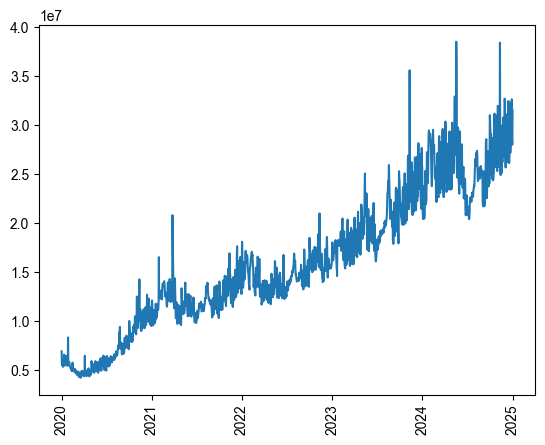

In [391]:
plt.plot(df["date_day"],df["dau"])
plt.xticks(rotation=90)

In [64]:
# 除夕前14天 与 除夕后14天同比
# 把除夕前后5天、15天的数据的每年数据画出来
def plot_each_year_together(df,df_pred,his_years,holi_time,return_df,pre_days=14,suf_days=0):
    """
    """
    x_days = list(range(-pre_days,0)) +[0] + list(range(1,suf_days+1))
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
    line_styles = ['-', '--', '-.', ':', 'solid', 'dashed']
    year_len = len(his_years)+1
    colors = colors[:year_len]
    line_styles = line_styles[:year_len]
    df_li = []
    for i,year in enumerate(his_years): # 看看历史元旦前的dau 与 春节后平稳下来的dau的对比
        chuxi_time = pd.to_datetime(holi_time.loc[year,"春节开始时间"])
        start = chuxi_time - pd.to_timedelta(f"{pre_days}Days")
        end = chuxi_time + pd.to_timedelta(f"{suf_days}Days")
        if year==2025:
            plot_df = df_pred
            label = "dau"
            linewidth=5
            s=300
        else:
            plot_df = df
            label = "dau"
            linewidth=2
            s=100
        y_dau_filter = (plot_df["date_day"]>=start) & (plot_df["date_day"]<=end)
        y_dau = plot_df[y_dau_filter][[label]].reset_index(drop=True)
        if year==2025:
            y_dau = return_df.loc[-pre_days:suf_days].reset_index(drop=True)
        y_dau.columns = [str(year)+"_dau"]
        df_li.append(y_dau)
    return pd.concat(df_li,axis=1)
his_years = [2021,2022,2023,2024,2025]


In [65]:
his_years = [2021,2022,2023,2024,2025][::-1]
# 除夕节前14天
pct_df = plot_each_year_together(df,df_pred,his_years,holi_time,return_df,pre_days=14,suf_days=0)
year_sum = pct_df.loc[:13].mean()
year_tongbi = year_sum.iloc[0]/year_sum
tongbi_df = pd.DataFrame(np.concatenate([year_sum.values.reshape(-1,1),year_tongbi.values.reshape(-1,1)],axis=-1),columns=["除夕前14天DAU均值","25年与其他年份的同比"])
tongbi_df.index = ["2025_T-14/"+str(year)+"_T-14" for year in his_years]
tongbi_df

# 注：25年为预测值(手动调整后的)

,除夕前14天DAU均值,25年与其他年份的同比
2025_T-14/2025_T-14,3.233820e+07,1.000000
2025_T-14/2024_T-14,2.801503e+07,1.154316
2025_T-14/2023_T-14,1.705774e+07,1.895807
2025_T-14/2022_T-14,1.545651e+07,2.092206
2025_T-14/2021_T-14,1.286268e+07,2.514110


In [66]:
his_years = [2021,2022,2023,2024,2025][::-1]
# 除夕节后14天
pct_df = plot_each_year_together(df,df_pred,his_years,holi_time,return_df,pre_days=0,suf_days=14)
year_sum = pct_df.loc[1:].mean()
year_tongbi = year_sum.iloc[0]/year_sum
tongbi_df = pd.DataFrame(np.concatenate([year_sum.values.reshape(-1,1),year_tongbi.values.reshape(-1,1)],axis=-1),columns=["除夕后14天DAU均值","25年与其他年份的同比"])
tongbi_df.index = ["2025T+14/"+str(year)+"T+14" for year in his_years]
tongbi_df

,除夕后14天DAU均值,25年与其他年份的同比
2025T+14/2025T+14,3.338076e+07,1.000000
2025T+14/2024T+14,2.716393e+07,1.228863
2025T+14/2023T+14,1.800146e+07,1.854336
2025T+14/2022T+14,1.626576e+07,2.052210
2025T+14/2021T+14,1.347537e+07,2.477168


In [105]:
pct_df

,2025_dau,2024_dau,2023_dau,2022_dau,2021_dau
0,3.440538e+07,27613425,16813922,15967201,12135222
1,3.561493e+07,28960175,17033950,15971882,16531395
2,3.621240e+07,29448774,16987705,16386101,12925549
3,3.626556e+07,29016754,17130197,16576893,13038961
4,3.641937e+07,29038157,17397542,16755142,12790736
5,3.544005e+07,28658636,17786093,16689547,12424075
6,3.552898e+07,28617191,17935746,16383803,12328880
7,3.520871e+07,29125131,18081494,15512047,12373285
8,3.386712e+07,28647090,18270083,15099371,12318112
9,3.267600e+07,28143646,17543410,14871136,12783096


In [68]:
# 12月份同比
his_years = [2021,2022,2023,2024,2025][::-1]
def month_tongbi(df,plot_df):
    li = []
    for year in his_years:
        if year==2025:
            df1 = plot_df
        else:
            df1 = df
        filter = (df1["date_day"].dt.year == year) & (df1["date_day"].dt.month == 12)
        li.append(df1[filter].reset_index(drop=True)["dau"].mean())
    return li
li = month_tongbi(df,df_pred)[1:]
li

[np.float64(28638038.322580647),
 np.float64(24330953.548387095),
 np.float64(15893184.483870968),
 np.float64(14056828.0)]

In [69]:
temp = li[0]
res_month_tongbi = temp/li

In [70]:
month_tongbi = pd.DataFrame(res_month_tongbi,columns=["24年12月份与其他年份同比"])
month_tongbi.index =  ["2024_12/"+str(i)+"_12" for i in his_years[1:]]
month_tongbi

,24年12月份与其他年份同比
2024_12/2024_12,1.000000
2024_12/2023_12,1.177021
2024_12/2022_12,1.801907
2024_12/2021_12,2.037304


In [113]:
from pprint import pprint

In [110]:

adjust = pd.read_csv("adjust.csv")["adjust_factor"].tolist()



In [118]:
adjust

[1.0, 1.0, 1.0, 1.0, 1.016177914, 1.01611636, 1.072275409, 1.0, 1.0, 1.0, 1.0, 0.934826654, 0.96023725, 1.087283431, 1.108678892, 1.102672445, 1.074554685, 0.979079886, 0.908891235, 1.003793715, 1.058000704, 1.067011932, 1.112737948, 1.081370956, 0.992170584, 0.913223853, 0.908577703, 0.965556112, 0.988984494, 1.152431726, 1.167372895, 1.09725143, 1.059149241, 1.005834667, 1.140602506, 1.167817561, 1.170921268, 1.149755951, 1.078578613, 0.956571116, 0.929559583, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [102]:
df_pred

,date_day,dau,log_dau,isweekend,环比增长率
0,2025-01-02,28318377,20250102,False,nan%
1,2025-01-03,28696490,20250102,False,1.34%
2,2025-01-04,30415899,20250102,True,5.99%
3,2025-01-05,29923580,20250102,True,-1.62%
4,2025-01-06,26619536,20250102,False,-11.04%
5,2025-01-07,26237633,20250102,False,-1.43%
6,2025-01-08,26394944,20250102,False,0.60%
7,2025-01-09,26530258,20250102,False,0.51%
8,2025-01-10,28057617,20250102,False,5.76%
9,2025-01-11,30906333,20250102,True,10.15%


In [117]:
df_pred.loc[df_pred['date_day'].isin(pd.date_range('20250107', '20250228')),'dau'] * adjust

5     2.623763e+07
6     2.639494e+07
7     2.653026e+07
8     2.805762e+07
9     3.140633e+07
10    3.152437e+07
11    2.967193e+07
12    2.942117e+07
13    2.970004e+07
14    3.037974e+07
15    3.261501e+07
16    3.404579e+07
17    3.403086e+07
18    3.411625e+07
19    3.380872e+07
20    3.263759e+07
21    3.159406e+07
22    3.086359e+07
23    3.015003e+07
24    2.951200e+07
25    2.841051e+07
26    2.804159e+07
27    3.280866e+07
28    3.342246e+07
29    3.354826e+07
30    3.309464e+07
31    3.286430e+07
32    3.276703e+07
33    3.310517e+07
34    3.344682e+07
35    3.389024e+07
36    3.351795e+07
37    3.341627e+07
38    3.361627e+07
39    3.381627e+07
40    3.401627e+07
41    3.418489e+07
42    3.360098e+07
43    3.318947e+07
44    3.227415e+07
45    3.132790e+07
46    2.990467e+07
47    2.938391e+07
48    2.944937e+07
49    2.947176e+07
50    3.101877e+07
51    3.399074e+07
52    3.392750e+07
53    3.007797e+07
54    2.952578e+07
55    2.956164e+07
56    2.955366e+07
57    3.1073

In [105]:
df_pred.loc[df_pred['date_day'].isin(pd.date_range('20250107', '20250228')),["date_day",'dau']]

,date_day,dau
5,2025-01-07,26237633
6,2025-01-08,26394944
7,2025-01-09,26530258
8,2025-01-10,28057617
9,2025-01-11,30906333
10,2025-01-12,31024375
11,2025-01-13,27671929
12,2025-01-14,29421167
13,2025-01-15,29700036
14,2025-01-16,30379738


In [120]:
a = pd.date_range('20250107', '20250228')

In [124]:
pd.DataFrame({"ds":a,"coefficient":adjust})

,ds,coefficient
0,2025-01-07,1.000000
1,2025-01-08,1.000000
2,2025-01-09,1.000000
3,2025-01-10,1.000000
4,2025-01-11,1.016178
5,2025-01-12,1.016116
6,2025-01-13,1.072275
7,2025-01-14,1.000000
8,2025-01-15,1.000000
9,2025-01-16,1.000000


In [130]:
coefficient = [1.0, 1.0, 1.0, 1.0, 1.016177914, 1.01611636, 1.072275409, 1.0, 1.0, 1.0, 1.0, 
            0.934826654, 0.96023725, 1.087283431, 1.108678892, 1.102672445, 1.074554685, 0.979079886, 
            0.908891235, 1.003793715, 1.058000704, 1.067011932, 1.112737948, 1.081370956, 0.992170584, 
            0.913223853, 0.908577703, 0.965556112, 0.988984494, 1.152431726, 1.167372895, 1.09725143, 
            1.059149241, 1.005834667, 1.140602506, 1.167817561, 1.170921268, 1.149755951, 1.078578613, 
            0.956571116, 0.929559583, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
ds = pd.date_range('20250107', '20250228')
coefficients_df = pd.DataFrame({"ds":ds,"coefficient":coefficient})

In [131]:
coefficients_df.to_csv("aa.csv")